# Matplotlib Library

## Testing

In [ ]:
'''
1. meshgrid
2. np.stack
3. 
'''

## Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')  # optional

## Usage

In [ ]:
n_row = 2; n_col = 3
x = []; y = []

fig, ax = plt.subplots(n_row, n_col, figsize(6, 3))

# Dynamically control size of each subplot
fig, ax = plt.subplots(1, columns, figsize=(columns*3.5, 2.5))

# Do not overlap subplots axis labels ...
fig.tight_layout()
# OR set subplots padding dynamically
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# Common method for implementing sqaure subplots
for i in range(n_row):
    for j in range(n_col):  
        ax[i, j].plot(x, y)
        ax[i, j].set_title('')  # or axs[i, j].title.set_text('')
        ax[i, j].plot(iters, purities, label=f'{num_cluster}')  # label: current curve's label, not figure title
        ax[i, j].set(xlabel='num_iters', ylabel='distortion')   # x, y-axis
        ax[i, j].legend(loc='upper left', title='num_clusters') # legend setting

# Extra:
# 1. Add grids in the background
ax.grid(linewidth='0.3', color='gray')

# 2. Save Plot
plt.savefig("squares.png")

# 3. Subplots share x and y axis
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# 4. More complicated arrangement
https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.GridSpec:-More-Complicated-Arrangements

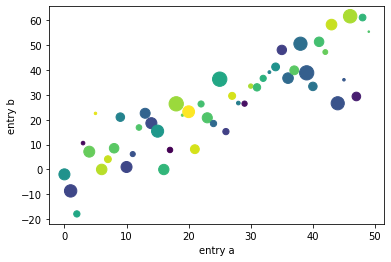

In [6]:
'''
Plotting with keyword strings

There are some instances where you have data in a format that lets you access 
particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.
'''
import numpy as np

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [ ]:
# Different category has different colors: c

plt.scatter(_x[:,0], _x[:,1], c=_y)

# Set the bounds of x and y axis of plotting
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

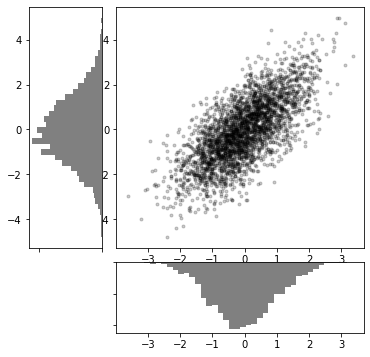

In [7]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [ ]:
# Plotting animation (not real animation)

def test_model(model):
    # our test datapoints will be the entire 2D grid spanning over $[-5, 5] x [-5, 5]$ plane
    # so that we could see the region that is classified as 0 or 1 as well as decision boundary.
    # !however, note that this is not the usual test setting.

    # fig, ax = plt.subplots(2, figsize=(10, 8))
    # fig.tight_layout()

    # build 2D grid
    x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)) 
    # print('x1_test.shape:', x1_test.shape)
    # print('x2_test.shape:', x2_test.shape)
    
    # print('np.stack.shape:', np.stack([x1_test, x2_test], axis=-1).shape)
    x_test = np.stack([x1_test, x2_test], axis=-1).reshape(10000, 2)
    # ax[0].plot(x_test[:, 0], x_test[:, 1])

    # call the `predict()` method to
    # predict the label for each test data point.
    y_predicted = model.predict(x_test)

    # plot the prediction result:
    # !!! the graph will show 2 regions clearly with a decision boundary(a line)
    pc = plt.contourf(x1_test, x2_test, y_predicted.reshape(100,100), alpha=0.2)

    # also plot the original data points
    # ax[1].plot(x_train[:,0], x_train[:,1], c=y_train)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

    # set equal scale for both x/y axis
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # fig.show()


from time import sleep
from IPython.display import clear_output

# Refresh the figure(output) for every 10 iterations
if i % 10 == 0:
    # print("Iteration {:3d}/{:3d} : NLL is {}".format(i, max_iter, nll))
    test_model(self)
    sleep(0.5)
    clear_output(wait=True)


In [ ]:
# Plot multiple curves on the same graph

plt.plot(X,y,"b.")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## Plot train and test error on same graph

In [ ]:
from tqdm import tqdm
#--- Load packages for datasets---
from sklearn.datasets import load_iris

#--- Load packages for logistic regression 
from sklearn.linear_model import LogisticRegression

#--- Load packages for train/test split---
from sklearn.model_selection import train_test_split


error_train = []
error_test = []
max_iter = []

# Try values from 1 - 100 for max iterations
for i in tqdm(range(1,100)):
    max_iter.append(i)
    X, y = load_iris(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)
    lr = LogisticRegression(C=0.01, random_state=3, max_iter = i) 
    lr.fit(X_train, y_train)
    
    # Append the values of training and testing error for plotting later
    error_train.append(1-lr.score(X_train, y_train))
    error_test.append(1-lr.score(X_test, y_test))

In [ ]:
# Using matplot library to plot the training/testing error over epochs
def plot(xaxis, yaxis_train, yaxis_test, label_x, label_y, title):
    plt.plot(xaxis,yaxis_train,label="Train")
    plt.plot(xaxis,yaxis_test,label="Test")
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.show()

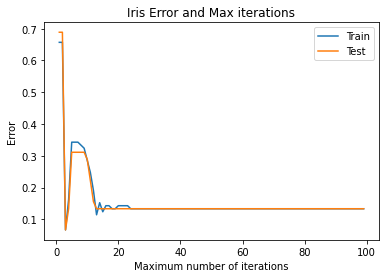

In [ ]:
plot(max_iter,error_train,error_test,"Maximum number of iterations","Error","Iris Error and Max iterations")

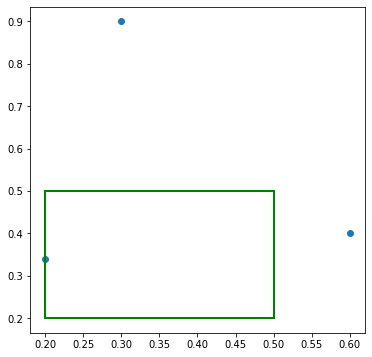

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

xs = [.3, .2, .6]
ys = [.9, .34, .4]
ax.scatter(xs, ys)
# ax.imshow(X, cmap = plt.cm.gray,
#           interpolation ='nearest')
ax.add_patch( Rectangle((0.2, 0.2),
                        0.3, 0.3,
                        fc ='none', 
                        ec ='g',
                        lw = 2) )
plt.show()

# Output Printing

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (10, 2))
print("Testing Error: {:.2f} %".format((4/75)*100))

Number of mislabeled points out of a total 10 points : 2
Testing Error: 5.33 %


In [ ]:
import pprint
import numpy as np

print('Pretty print:')
pp = pprint.PrettyPrinter(indent=4)
a = np.array([i for i in range(30)])
pp.pprint(a)

print('Normal print:')
print(a)

Pretty print:
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
Normal print:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [ ]:
X_new = np.linspace(0,3,10)

pp.pprint(X_new)
print(X_new.shape)

X_new = X_new.reshape(-1,1)
pp.pprint(X_new)
print(X_new.shape)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])
(10,)
array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ],
       [1.33333333],
       [1.66666667],
       [2.        ],
       [2.33333333],
       [2.66666667],
       [3.        ]])
(10, 1)


In [ ]:
import torch
def shuffle_group_conv(x, groups=3):
    
    group_conv1 = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                    stride=1, padding=1, dilation=1,
                    groups=groups, bias=True, padding_mode='zeros')

    group_conv2 = torch.nn.Conv2d(in_channels, out_channels, kernel_size,
                    stride=1, padding=1, dilation=1,
                    groups=groups, bias=True, padding_mode='zeros')

    # Forward the input x into the first group convolutional layer
    x = group_conv1(x)

    # Channels shuffling 
    bat_size, channels, w, h = x.shape
    # Calculate number of channels for each group
    group_c = channels // groups
    # Divide data into groups y adding one more dimension for group
    x = x.view(bat_size, groups, channels//groups, w, h)
    # Apply transpose to allow mixing of data within groups
    x = torch.transpose(x, 1, 2).contiguous()
    x = x.view(bat_size, -1, w, h)
    
    # Forward the input x into the second group convolutional layer
    x = group_conv2(x)

    return x


In [ ]:
def IOU(mask1, mask2):
    # Since two masks are made of 0 and 1 only,
    # we can use AND operation to find the intersection where both are 1's
    intersection = torch.logical_and(mask1, mask2).sum()

    # Similarly we use OR operation to find out the union part
    union = torch.logical_or(mask1, mask2).sum()
    return intersection / union

# Scipy Library

In [ ]:
# Scipy is a useful Python package for you to play with probability distributions.
from scipy.stats import norm  # import univariate Gaussian (normal) distribution
mu = 1.1
sigma = 0.1

# create a univariate Gaussian distribution
dist = norm(mu, sigma)
N = 10


x = dist.rvs(size=N) # draw N random samples
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(10,)
[1.041 0.903 1.112 1.14  1.206 1.008 0.949 1.09  0.994 1.106]


# GAN

In [ ]:
class GAN():
    def __init__(self):
        xxxx

    def forward(self):
        """Run forward pass; called by both functions <optimize_parameters> and <test>."""
        self.fake_B = self.netG(self.real_A)  # G(A)

    def backward_D(self):
        """Calculate GAN loss for the discriminator"""

        # Calculate loss for Fake images generated by generator; stop backprop to the generator by detaching fake_B
        # we use conditional GANs; we need to feed both input and output to the discriminator
        fake_AB = torch.cat((self.real_A, self.fake_B),1) 
        pred_fake = self.netD(fake_AB.detach()) # inference the fake sample
        self.loss_D_fake = self.criterionGAN(pred_fake, False)
        
        # Calculate loss for inferring Real images
        real_AB = torch.cat((self.real_A, self.real_B), 1)
        pred_real = self.netD(real_AB) # inference the real sample
        self.loss_D_real = self.criterionGAN(pred_real, True)
        
        # combine loss and calculate gradients
        self.loss_D = (self.loss_D_fake + self.loss_D_real) * 0.5
        self.loss_D.backward()

    def backward_G(self):
        """Calculate GAN and L1 loss for the generator"""
        # First, G(A) should fake the discriminator
        fake_AB = torch.cat((self.real_A, self.fake_B), 1)
        pred_fake = self.netD(fake_AB)
        self.loss_G_GAN = self.criterionGAN(pred_fake, True)
        # Second, G(A) = B
        self.loss_G_L1 = self.criterionL1(self.fake_B, self.real_B) * self.opt.lambda_L1
        # combine loss and calculate gradients
        self.loss_G = self.loss_G_GAN + self.loss_G_L1
        self.loss_G.backward()

    def optimize_parameters(self):
        self.forward()  # compute fake images: G(A)
        # update D
        self.set_requires_grad(self.netD, True)  # enable backprop for D
        self.optimizer_D.zero_grad()   # set D's gradients to zero
        self.backward_D()   # calculate gradients for D
        self.optimizer_D.step()  # update D's weights
        # update G
        self.set_requires_grad(self.netD, False)   # D requires no gradients when optimizing G
        self.optimizer_G.zero_grad()   # set G's gradients to zero
        self.backward_G()   # calculate graidents for G
        self.optimizer_G.step()  # udpate G's weights
        
if __name__ == '__main__':
    model = GAN()
    model.optimize_parameters()

In [ ]:
# Cycle GAN

class CycleGAN():
    def __init__(self):
        xxxx

    def forward(self):
        """Run forward pass; called by both functions <optimize_parameters> and <test>."""
        self.fake_B = self.netG_A(self.real_A)  # G_A(A)
        self.rec_A = self.netG_B(self.fake_B)   # G_B(G_A(A))
        self.fake_A = self.netG_B(self.real_B)  # G_B(B)
        self.rec_B = self.netG_A(self.fake_A)   # G_A(G_B(B))

    def backward_D_basic(self, netD, real, fake):
        """Calculate GAN loss for the discriminator

        Parameters:
            netD (network)      -- the discriminator D
            real (tensor array) -- real images
            fake (tensor array) -- images generated by a generator

        Return the discriminator loss.
        We also call loss_D.backward() to calculate the gradients.
        """
        # Real
        pred_real = netD(real)
        loss_D_real = self.criterionGAN(pred_real, True)
        # Fake
        pred_fake = netD(fake.detach())
        loss_D_fake = self.criterionGAN(pred_fake, False)
        # Combined loss and calculate gradients
        loss_D = (loss_D_real + loss_D_fake) * 0.5
        loss_D.backward()
        return loss_D

    def backward_D_A(self):
        """Calculate GAN loss for discriminator D_A"""
        fake_B = self.fake_B_pool.query(self.fake_B)
        self.loss_D_A = self.backward_D_basic(self.netD_A, self.real_B, fake_B)

    def backward_D_B(self):
        """Calculate GAN loss for discriminator D_B"""
        fake_A = self.fake_A_pool.query(self.fake_A)
        self.loss_D_B = self.backward_D_basic(self.netD_B, self.real_A, fake_A)

    def backward_G(self):
        """Calculate the loss for generators G_A and G_B"""
        lambda_idt = self.opt.lambda_identity
        lambda_A = self.opt.lambda_A
        lambda_B = self.opt.lambda_B
        # Identity loss
        if lambda_idt > 0:
            # G_A should be identity if real_B is fed: ||G_A(B) - B||
            self.idt_A = self.netG_A(self.real_B)
            self.loss_idt_A = self.criterionIdt(self.idt_A, self.real_B) * lambda_B * lambda_idt
            # G_B should be identity if real_A is fed: ||G_B(A) - A||
            self.idt_B = self.netG_B(self.real_A)
            self.loss_idt_B = self.criterionIdt(self.idt_B, self.real_A) * lambda_A * lambda_idt
        else:
            self.loss_idt_A = 0
            self.loss_idt_B = 0

        # GAN loss D_A(G_A(A))
        self.loss_G_A = self.criterionGAN(self.netD_A(self.fake_B), """_____Blank_____""")
        # GAN loss D_B(G_B(B))
        self.loss_G_B = self.criterionGAN("""_____Blank_____""")
        # Forward cycle loss || G_B(G_A(A)) - A||
        self.loss_cycle_A = self.criterionCycle("""_____Blank_____""") * lambda_A
        # Backward cycle loss || G_A(G_B(B)) - B||
        self.loss_cycle_B = self.criterionCycle("""____Blank_____""") * lambda_B
        # combined loss and calculate gradients
        self.loss_G = self.loss_G_A + self.loss_G_B + self.loss_cycle_A + self.loss_cycle_B + self.loss_idt_A + self.loss_idt_B
        self.loss_G.backward()

    def optimize_parameters(self):
        """Calculate losses, gradients, and update network weights; called in every training iteration"""
        # forward
        self.forward()      # compute fake images and reconstruction images.
        # G_A and G_B
        self.set_requires_grad([self.netD_A, self.netD_B], False)  # Ds require no gradients when optimizing Gs
        self.optimizer_G.zero_grad()  # set G_A and G_B's gradients to zero
        self.backward_G()             # calculate gradients for G_A and G_B
        self.optimizer_G.step()       # update G_A and G_B's weights
        # D_A and D_B
        self.set_requires_grad([self.netD_A, self.netD_B], True)
        self.optimizer_D.zero_grad()   # set D_A and D_B's gradients to zero
        self.backward_D_A()      # calculate gradients for D_A
        self.backward_D_B()      # calculate graidents for D_B
        self.optimizer_D.step()  # update D_A and D_B's weights

if __name__ == '__main__':
    model = CycleGAN()
    model.optimize_parameters()